# Regression Analysis of the NPLD Stratigraphy
## CMPS 6160 Final Tutorial - Alan Braeley

### Project website:
https://abraeley.github.io/

### Project repository: 
https://github.com/abraeley/abraeley.github.io

### Project data: 
https://github.com/abraeley/abraeley.github.io/data

#### Raw SHARAD data: 
https://pds-geosciences.wustl.edu/missions/mro/sharad.htm



__Background:__ The north and south poles of Mars are composed primarily of a combination of water ice, dust, and in the south, carbon dioxide. These polar ice caps are often referred to as the north and south polar layered deposits (NPLD/SPLD). The PLD are thought to record up to approximately 5 Mya of climate history on Mars, trapped in the stratigraphy of the ice. In order to study and learn from this geological history,  we must first be able to properly interpret the data. When the dielectric properties of a layer interface with another, a radar reflection (called a "reflector") may be generated. The radar data that is recieved back takes the form of a cross-section of the ice cap, from the surface to the bedrock below the ice:

<center><img src="images/radargram.png"/></center>

The brightness of each reflector tells us something about the material composition of the layer, while the time it takes to receive a reflection back tells us the depth of the reflector (since radar moves consistently at the speed of light). A reflector's brightness is determined by the difference between the dielectric properties of two layers. The instrument that is used to collect these radargrams is called SHARAD (shallow radar), a radar sounder aboard the Mars Reconnaissance Orbiter. SHARAD emits a 15-25 MHz radar signal into the ice caps in order to see into the interior structure beneath the surface of the ice.

Cutting into the NPLD are troughs inside which exposed stratigraphic layerse are visible in optical light:

<center><img src="images/layers.jpg"/></center>

It has been thought that these stratigraphic layers correspond in a one-to-one basis with the reflectors seen in SHARAD radargrams. 

__Motivation:__ A collaborator on my research (Dr. Bruce Campbell) split the radar data into two sub-bands (called split chirp data): a low frequency sub band of 15-20 MHz, and a high-frequency band of 20-25 MHz:

<center><img src="images/example.gif"/></center>

From this it is clear that there are differences between the high and low frequency radar data. Implicit therein is that at least some of the PLD is sensitive to the frequency of the radar. This resolution-sensitive is telling, as radar is already some distance from the optical part of the electromagnetic spectrum. It is therefore unlikely that one can assume a one-to-one relationship between images in radio-wavelength data with those seen in optical data. The reflectors in the PLD is therefore not the same as a stratigraphic layer, as seen in photographs.

### Model-Generated Data:
I will be using two datasets: one that I generate, and one that comes from SHARAD (shallow radar) sounder data from the Mars Reconnaissance Orbiter. 


The first dataset is to be created by using the 1-dimensional model developed by Sam Courville from the SHARAD team. This model takes in several "layer property" parameters (as opposed to processing parameters):

<center><img src="images/1dmodel.png"/></center>

As shown above, number of layers (n), thicknesses of the layers (m) (the final layer is considered unbounded so the thickness is effectively infinite and does not count), the dielectric constants of the layers, and the loss tangents of the layers are all input parameters. The other parameters vary the way the model processes the layer property parameters. For example, rather than using the SHARAD instrument frequency band (15-25 MHz), a sub band can be used (i.e. 15-20 MHz), or a different frequency range can be selected altogether.

The model outputs a dataset contained in a csv file, with time (in microseconds), power (in dB) and amplitude columns. It also plots the power as a function of time, with power on the x-axis:

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Reading in the csv files
low3df = pd.read_csv('data/Intersection_3/Model3_L_output_data.csv', sep=",")
high3df = pd.read_csv('data/Intersection_3/Model3_H_output_data.csv', sep=",")
low3df.head(10)

,Time (s),power (dB),amplitude (real),amplitude (imag)
0,-0.000043,-57.853135,-3.892997e-09,-3.692354e-10
1,-0.000042,-57.779216,3.897481e-09,6.032395e-10
2,-0.000042,-57.313703,-4.094372e-09,-7.417902e-10
3,-0.000042,-56.853206,4.335889e-09,6.715193e-10
4,-0.000042,-56.701135,-4.444132e-09,-4.319517e-10
5,-0.000042,-56.957712,4.331215e-09,1.836783e-10
6,-0.000042,-57.521867,-4.061128e-09,-1.051084e-10
7,-0.000042,-58.031659,3.821435e-09,2.693440e-10
8,-0.000042,-57.999919,-3.802190e-09,-5.717598e-10
9,-0.000042,-57.404672,4.042892e-09,7.811902e-10


Text(0.5, 1.0, 'High Freq (20-25 MHz)')

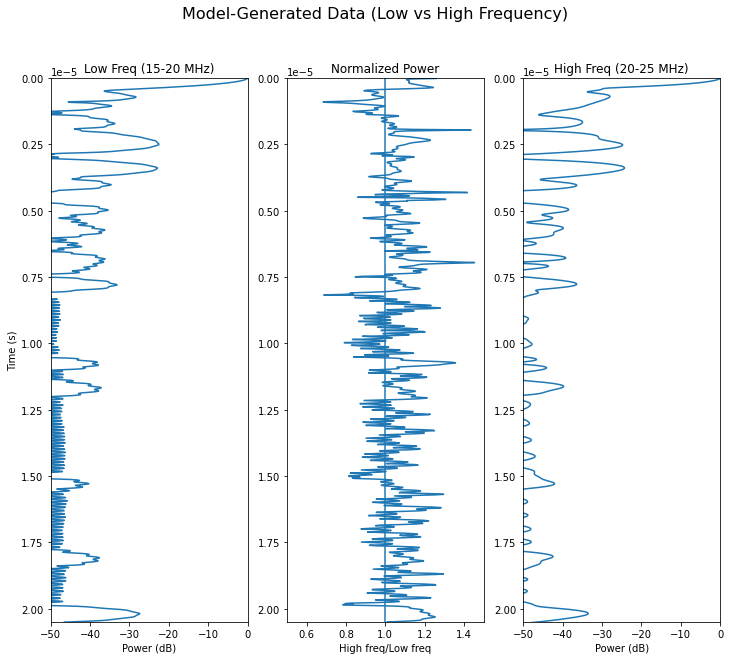

In [2]:
# Creating three figures, a high frequency,  low frequency, and normalized frequencies plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,10))
fig.suptitle('Model-Generated Data (Low vs High Frequency)', fontsize=16)

lowExample = low3df.plot(ax=axes[0], x='power (dB)', y='Time (s)', xlabel="Power (dB)", ylabel="Time (s)", legend=False)
lowExample.set_ylim(0, 0.0000205)
lowExample.set_xlim(-50, 0)
lowExample.invert_yaxis()
lowExample.set_title("Low Freq (15-20 MHz)")

normdf = high3df
normdf["Normalized (High/Low)"] = high3df["power (dB)"]/low3df["power (dB)"]
normalizedPlot = normdf.plot(ax=axes[1], x="Normalized (High/Low)", y='Time (s)', xlabel="High freq/Low freq", legend=False)
normalizedPlot.set_ylim(0, 0.0000205)
normalizedPlot.set_xlim(0.5, 1.5)
normalizedPlot.invert_yaxis()
normalizedPlot.axvline(1)
normalizedPlot.set_title("Normalized Power")

highExample = high3df.plot(ax=axes[2], x='power (dB)', y='Time (s)', xlabel="Power (dB)", legend=False)
highExample.set_ylim(0, 0.0000205)
highExample.set_xlim(-50, 0)
highExample.invert_yaxis()
highExample.set_title("High Freq (20-25 MHz)")

Shown above are two such model-generated plots (and a normalized figure too). Made by manually entering the layer parameters in the 1D Radar Simulator model and changing the frequency bands into a low and high frequency (15-20 MHz, and 20-25 MHz respectively). It should be noted that time is a stand-in for distance/depth beneath the surface of the ice cap, as the speed of light is a constant. The following formula can be used to convert the time to distance:

<center><h1>$ d = \frac{tc}{2\sqrt{\epsilon}} $</h1></center>

Where $d$ is distance, $t$ is time it takes to receive the radar return and $\epsilon$ is the dielectric constant.

The power vs time figures showcase that the reflectors are sensitive to radar frequency (note that although the normalized power subplot is approximately centered around one, there are power peaks that appear uniquely in the low and high frequency figures (at the same depth beneath the surface ice). The normalized plot shows that there are significant, and extensive, differences between the split data, implying sensitivity to the changing frequency bands.

### SHARAD Split Chirp Data

The raw SHARAD data comes in the form of a radargram, which is recorded in a single track as the MRO spacecraft orbits above Mars:

<center><img src="images/tracks.png"/></center>

All radargrams are 3600 pixels tall (there are 3600 pixel rows comprising the image). In order to replicate the data produced by the SHARAD model, a one-pixel-wide, vertical column of power values can be taken at each pixel from spanning the height of the radargram. By then cutting the data to the surface and basal reflectors in the figure a power versus time figure will be produced out of the split chirp data. Each pixel down is equivalent to 0.0375 microseconds of time (and therefore has a corresponding distance value too).

In [3]:
# Setting some basic parameters (selecting where on the rows I want to an)
timePixel = 0
columnNumber = 1110

# Reading in the SHARAD split chirp data
with open('data/s_03196501/S_03196501_L_RGRAM.IMG', mode='r') as f:
 data = np.fromfile(f,dtype=np.float32)
 #datatest = np.matrix(data)

radargram = data.reshape(3600, -1)


powerColumn1 = []
time = []

columnNumber -= 1
#Python starts iterating at zero so the last column is columnNumber - 1

for pixelRow in range(0,len(radargram)):
    #print("pixelRow: "+pixelRow+" Raw power: "+)
    
    '''
    Iterating straight down at a given column
    Using the center column value as a pixel value reference, 
    take the left and right 10 columns-worth of data. In order to do this 
    find the pixel value in the column to the left and right of the center 
    column that most matches that of the center reference pixel value. 
    By doing this I will be able to follow the path of each continuous lateral
    reflector as I take averages downward.
    '''
    time.append(timePixel)
    
    # time per pixel
    timePixel+=0.0375
    
    leftNum = columnNumber - 1
    leftNum2 = columnNumber - 2
    leftNum3 = columnNumber - 3
    rightNum = columnNumber + 1
    rightNum2 = columnNumber + 2
    rightNum3 = columnNumber + 3
        
    rowLeft3 = radargram[pixelRow][leftNum3]
    rowLeft2 = radargram[pixelRow][leftNum2]
    rowLeft = radargram[pixelRow][leftNum]
    rowCenter = radargram[pixelRow][columnNumber]
    rowRight = radargram[pixelRow][rightNum]
    rowRight2 = radargram[pixelRow][rightNum2]
    rowRight3 = radargram[pixelRow][rightNum3]

    powerRow = [rowLeft,rowLeft2,rowLeft3,rowCenter,rowRight,rowRight2,rowRight3]

    powerRow = [10*math.log10(x) for x in powerRow]
    powerRow = sum(powerRow)/len(powerRow) #Average of columns
    powerColumn1.append(powerRow)
    
# Top of surface reflector  
beginning = 2377

# Top of basal reflector
end = 2897

time = time[beginning:end]
powerColumn1 = powerColumn1[beginning:end]

In [4]:
# Reading in the high frequency data
timePixel = 0   

columnNumber = 1110

with open('data/s_03196501/S_03196501_H_RGRAM.IMG', mode='r') as f:
 data = np.fromfile(f,dtype=np.float32)
radargram = data.reshape(3600, -1)

powerColumn2 = []
time = []

columnNumber -= 1
#Python starts iterating at zero so the last column is columnNumber - 1

for pixelRow in range(0,len(radargram)):
    
    '''
    Iterating straight down at a given column
    Using the center column value as a pixel value reference, 
    take the left and right 10 columns-worth of data. In order to do this 
    find the pixel value in the column to the left and right of the center 
    column that most matches that of the center reference pixel value. 
    By doing this I will be able to follow the path of each continuous lateral
    reflector as I take averages downward.
    '''
    time.append(timePixel)

    timePixel+=0.0375
    
    leftNum = columnNumber - 1
    leftNum2 = columnNumber - 2
    leftNum3 = columnNumber - 3
    rightNum = columnNumber + 1
    rightNum2 = columnNumber + 2
    rightNum3 = columnNumber + 3
    
    rowLeft3 = radargram[pixelRow][leftNum3]
    rowLeft2 = radargram[pixelRow][leftNum2]
    rowLeft = radargram[pixelRow][leftNum]
    rowCenter = radargram[pixelRow][columnNumber]
    rowRight = radargram[pixelRow][rightNum]
    rowRight2 = radargram[pixelRow][rightNum2]
    rowRight3 = radargram[pixelRow][rightNum3]
    
    powerRow = [rowLeft,rowLeft2,rowLeft3,rowCenter,rowRight,rowRight2,rowRight3]

    powerRow = [10*math.log10(x) for x in powerRow]
    powerRow = sum(powerRow)/len(powerRow) #Average of columns
    powerColumn2.append(powerRow)
    
# Top of surface reflector  
beginning = 2383

# Top of basal reflector in the radargram
end = 2903

time = time[beginning:end]
powerColumn2 = powerColumn2[beginning:end]

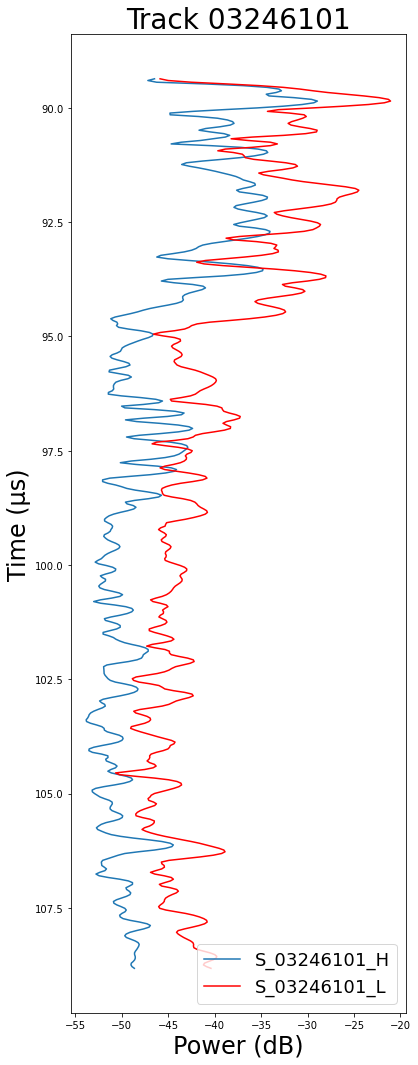

In [5]:
# Plotting the power versus time figures for both high and low frequency data
fig, axs = plt.subplots(figsize=(6,18)) 
plt.plot(powerColumn2,time)  
plt.plot(powerColumn1,time, color='red') 
plt.title("Track 03246101", fontsize=28)
plt.legend(["S_03246101_H", "S_03246101_L"], loc=4, fontsize=18)
plt.xlabel('Power (dB)', fontsize=24)  
plt.ylabel('Time (\u03BCs)', fontsize=24)
axs.invert_yaxis()
plt.show()

__Plan and question(s) to be answered:__  My goal is to leverage the one-dimensional model created by the SHARAD team (introduced below) in order to determine what of the model input parameters (dielectric constant, layer thickness, etc.) has what sort of impact on the reflectors as a function of frequency. After that, my goal will be to apply this knowledge to the split chirp SHARAD data in order to explore the interior stratigraphy, the geospatial distribution of dielectric properties and to hopefully serve as a stepping stone forward in our ability to further unlock the recent martian climate history.

To accomplish this I will write a python script to automate the varying of input parameters, and the running of the SHARAD model. With a large dataset outputted by the model, I will then use the various input parameters for each respective model dataset in order to train a neural network, where the model input parameters (and their respective models) will become the various input features for the neural network.


### Neural network for regression:

<center><img src="images/neuralnetwork.png"/></center>

__Input 1:__ Vertical column of pixels from the radargram

__Output 1:__ Number of layers (n)

__Output 2:__ Thicknesses of n-1 layers (m)

__Output 3:__ Real relative dielectric constants of n layers

At this point I will apply the neural network to the actual SHARAD split chirp data, hopefully revealing a new understanding of how stratigraphy and material composition impact reflectors in the SHARAD split chirp data.


The neural network I will be using is the "Multilayer Perceptron Classifier" (MPC) tool from Scikit Learn.

In order to properly generate the training data needed to feed into the MPC tool, I downloaded the 1D model written by the NASA SHARAD team:

In [4]:
ls SHARAD_1D_Model/*.py

SHARAD_1D_Model/radar_FM1D_refMethod.py*


This python script generates the the .csv files that contain modelled data analogous to the vertical pixel column of power values taken from the radargram data that I plotted above as "Track 03246101". In order to run it however, I need to generate the input parameters to feed into the model (shown above in the "1D Radar Simulator" image).

Since this is a tedious task to do manually, I wrote a script to run the 1D python model locally:

In [ ]:
the# Generate the parameters
## -> Vary layers

# Surface to basal reflector depth (meters)
depth = 2000

modelCount = 1

# Number of layers
for layerThickness in np.arange(0.01, depth, 0.01):
    #if depth % layerThickness != 0.0:
       # continue # The layers must be evenly divisible into the depth
        # This allows for a consistent depth across models
    thicknessList = []
    iterationLayerList = [] # Thickness list for *current* iteration
    dielectricList = []
    lossTangentList = []
    numberOfLayers = depth // layerThickness # Number of layers that cleanly divides into depth
    thicknessList.append(layerThickness) # This will be what is iterated over to generate each model         
   
    for i in range(int(numberOfLayers)):
        iterationLayerList.append(str(layerThickness))
        
        # Note, the dielectric constant NEEDS to be changed between layers to generate a reflection
        if (i%2) != 0:
            # Hard coding average dielectric value from Grima et al. 2009 --> 3.10
            dielectricList.append(str(3.4))
            # Hard coding average loss tangent value from Grima et al. 2009 --> 0.0026
            lossTangentList.append(str(0.0026))
        else:
             # Hard coding average dielectric value from Grima et al. 2009 --> 3.10
            dielectricList.append(str(2.8))
            # Hard coding average loss tangent value from Grima et al. 2009 --> 0.0026
            lossTangentList.append(str(0.0026))
        
    # Generate the model
    with open('model_'+str(modelCount)+'.txt', 'w') as f:
        f.write('### 1D Radar Sounding Forward Model file')
        f.write('\n')
        f.write('# Observation height/altitude above ground (meters)')
        f.write('\n')
        f.write('300e3')
        f.write('\n')
        f.write('# Approximate noise floor value in dB (ignored if less than -100dB)')
        f.write('\n')
        f.write('-101')
        f.write('\n')
        f.write('# Number of layers, n')
        f.write('\n')
        f.write(str(int(numberOfLayers)))
        f.write('\n')
        f.write('# Layer thicknesses (put n-1 values, last layer assumed to be infinite)')
        f.write('\n')
        f.write(" ".join(iterationLayerList))
        f.write('\n')
        f.write('# Real relative dielectric permittivity')
        f.write('\n')
        f.write(" ".join(dielectricList))
        f.write('\n')
        f.write('# Do you want to use conductivity (1) or loss tangent (0)?')
        f.write('\n')
        f.write('0')
        f.write('\n')
        f.write('# Loss tangent for each layer, or conductivity')
        f.write('\n')
        f.write(" ".join(lossTangentList))
        f.write('\n')
        f.write('# directory/file of time domain source pulse')
        f.write('\n')
        f.write('Sharad_Ideal_sourcePulse.csv')
        f.write('\n')
        f.write('# directory/file of frequency domain matched filter (or "none")')
        f.write('\n')
        f.write('Sharad_Ideal_matchedFilter.csv')
        f.write('\n')
        f.write('# Kaiser window degree (0 for no windowing)')
        f.write('\n')
        f.write('6')
        f.write('\n')
        f.write('# Window frequencies')
        f.write('\n')
        f.write('15e6 20e6')
    modelCount+=1

In the interest of preventing a mess, I will abstain from running the above cell here again, as it would generate many models. I ran this on my computer and created several thousand model .txt files. Here is an example of one of the model files:

In [7]:
cat SHARAD_1D_Model/model_4626.txt

### 1D Radar Sounding Forward Model file
# Observation height/altitude above ground (meters)
300e3
# Approximate noise floor value in dB (ignored if less than -100dB)
-101
# Number of layers, n
43
# Layer thicknesses (put n-1 values, last layer assumed to be infinite)
46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26 46.26
# Real relative dielectric permittivity
2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8 3.4 2.8
# Do you want to use conductivity (1) or loss tangent (0)?
0
# Loss tangent for each layer, or conductivity
0.0026 0.0026 0.0026 0.0026 0.0026 0.0026 0.0026 0.0026 0.0026 0.0026 0.0026 0.0026 0.0026 0.0026 0.0026 0.0026 0.0026 0.0026 0.0026 0.0026 0.0026 0.0026

Note that this model file is the raw text to feed into the SHARAD 1D simulator, typically it is rendered in a GUI. The GUI image is what you see in the "1D Radar Simulator" image. Once my script generated several thousand models, I needed to write a shellscript to actually run the 1D radar simulator pythone script for each model. As there are thousands I wanted to generate models, the shellscript was necessary:

In [8]:
cat SHARAD_1D_Model/runModels.sh

#!/bin/bash

for f in *.txt; do python radar_FM1D_refMethod.py ${f}; done;


For the sake of simplicity, I am starting off by varying only the number of layers/layer thicknesses, ignoring other possible ways to vary the data like the two frequency subbands, as well as variations of the dielectric constants. I hold the total depth from the surface of the ice, to the base of the ice the same (2000 meters). I vary the dielectric constant from 3.4 to 2.8, which gives an average of 3.1, and a loss tangent of 2.6 (Grima et al. 2009). If I didn't vary the dielectric constant at all, no reflections would be generated.

After running the 1D simulator with my models, I was able to generate (as .csv files) my model-generated data:

In [9]:
ls data/*.csv

data/model_1000_output_data.csv  data/model_2000_output_data.csv
data/model_1001_output_data.csv  data/model_2001_output_data.csv
data/model_1002_output_data.csv  data/model_2002_output_data.csv
data/model_1003_output_data.csv  data/model_2003_output_data.csv
data/model_1004_output_data.csv  data/model_2004_output_data.csv
data/model_1005_output_data.csv  data/model_2005_output_data.csv
data/model_1006_output_data.csv  data/model_2006_output_data.csv
data/model_1007_output_data.csv  data/model_2007_output_data.csv
data/model_1008_output_data.csv  data/model_2008_output_data.csv
data/model_1009_output_data.csv  data/model_2009_output_data.csv
data/model_1010_output_data.csv  data/model_2010_output_data.csv
data/model_1011_output_data.csv  data/model_2011_output_data.csv
data/model_1012_output_data.csv  data/model_2012_output_data.csv
data/model_1013_output_data.csv  data/model_2013_output_data.csv
data/model_1014_output_data.csv  data/model_2014_output_data.csv
data/model_1015_output_da

<center><img src="images/models.gif"/></center>

Here is an example of the various model-generated datasets. Each model increases the stratigraphic layer thickness by 10 centimeters (0.01 m), and the models above show what the expected radar reflections would look like, given the input parameters.

In [6]:
cd data

/home/abraeley/Downloads/abraeley.github.io-main/data


### Validating the Data

If I use the distance equation shown above to convert the time to get radar return signals to depth/distance, it becomes clear that this data needs to be cleaned further:

In [7]:
model1000 = pd.read_csv('model_1000_output_data.csv', sep=",")
model1000["Distance"] = (model1000["Time (s)"]*(3e8))/(2*np.sqrt(3.1))
model1000.head(),model1000.tail()

(   Time (s)  power (dB)  amplitude (real)  amplitude (imag)     Distance
 0 -0.000043  -58.708651     -3.754318e-09      2.807403e-10 -3620.756693
 1 -0.000042  -58.848845      3.693893e-09     -2.804356e-10 -3619.052407
 2 -0.000042  -58.934609     -3.661016e-09      2.282432e-10 -3617.348120
 3 -0.000042  -58.868730      3.692362e-09     -1.651007e-10 -3615.643834
 4 -0.000042  -58.671926     -3.777640e-09      1.533726e-10 -3613.939547,
       Time (s)  power (dB)  amplitude (real)  amplitude (imag)     Distance
 4245  0.000042  -58.924782      3.661466e-09     -2.815716e-10  3613.939547
 4246  0.000042  -58.975319     -3.645935e-09      1.917198e-10  3615.643834
 4247  0.000042  -58.839233      3.705903e-09     -1.420481e-10  3617.348120
 4248  0.000042  -58.681094     -3.773148e-09      1.652132e-10  3619.052407
 4249  0.000043  -58.630476      3.791886e-09     -2.297088e-10  3620.756693)

Firstly, I should not have negative distances. Secondly, I set all of the models to have an approximate depth of 2000 meters. It is an artifact of the 1D SHARAD Simulator that extra data is created "outside" the bounds of the model. In order to avoid confusion (for us, as well as for the neural network) this data needs to be ignored/removed. Below I import several models and calculate the indeces for the surface of the ice, as well as for the basal reflector at the bottom of the ice. Then, the plots contain only the information pertinent to us:

In [8]:
cd /home/abraeley/Downloads/abraeley.github.io-main/data

/home/abraeley/Downloads/abraeley.github.io-main/data


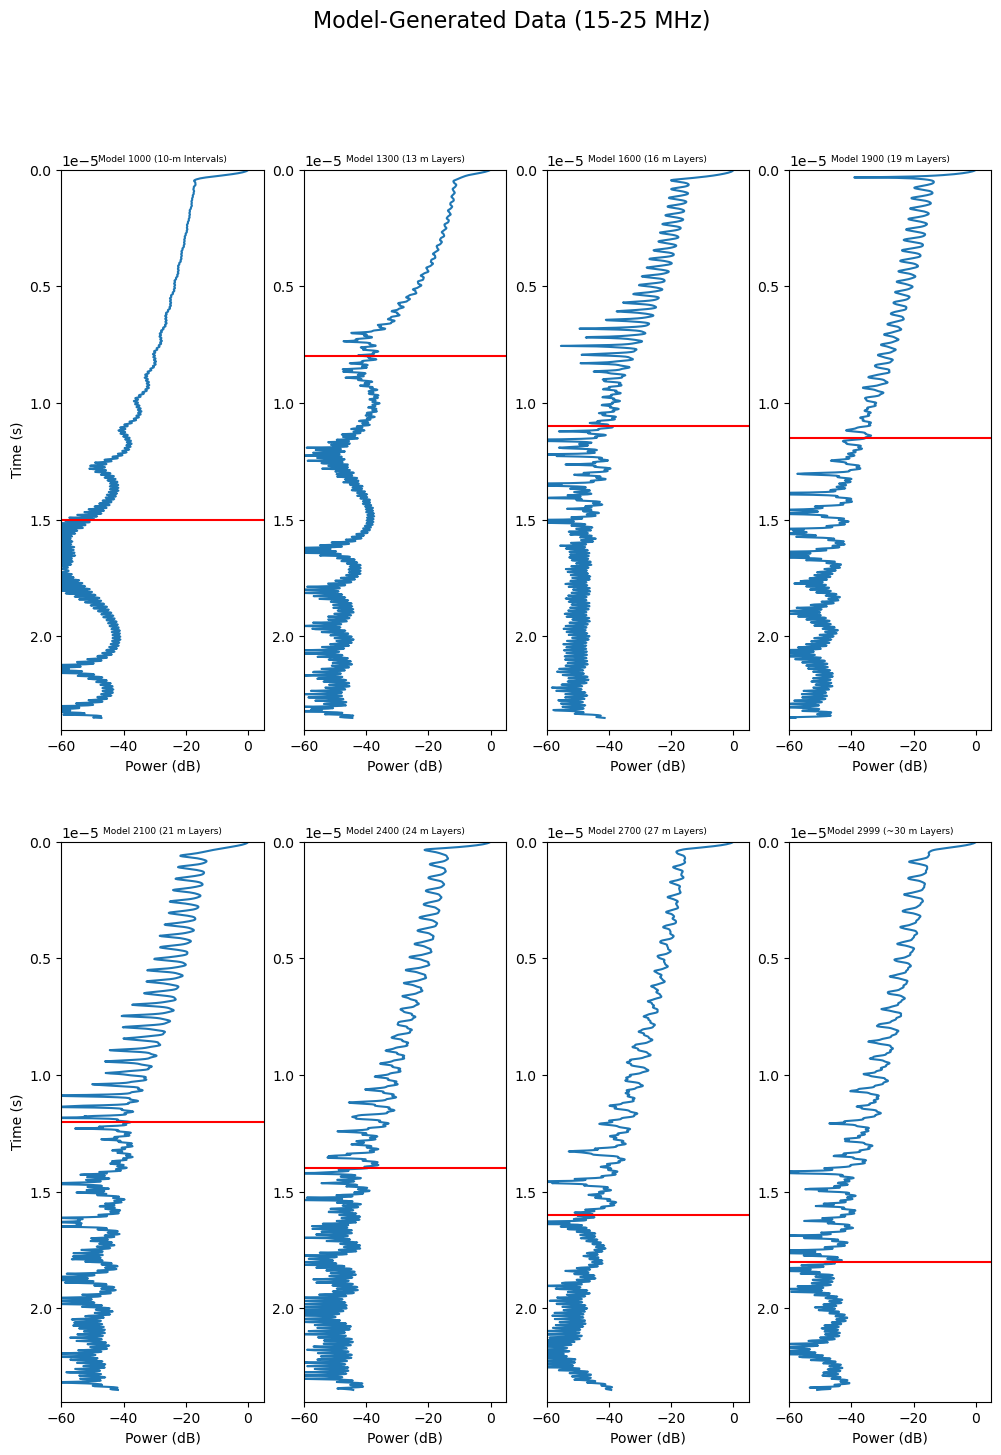

In [16]:
model1000 = pd.read_csv('model_1000_output_data.csv', sep=",")

model1300 = pd.read_csv('model_1300_output_data.csv', sep=",")

model1600 = pd.read_csv('model_1600_output_data.csv', sep=",")

model1900 = pd.read_csv('model_1900_output_data.csv', sep=",")

model2100 = pd.read_csv('model_2100_output_data.csv', sep=",")

model2400 = pd.read_csv('model_2400_output_data.csv', sep=",")

model2700 = pd.read_csv('model_2700_output_data.csv', sep=",")

model2999 = pd.read_csv('model_2999_output_data.csv', sep=",")

# Clean data (remove negative times)

# Model1000
model1000["Distance"] = (model1000["Time (s)"]*(3e8))/(2*np.sqrt(3.1))
surfaceIndex = int(model1000.loc[model1000["Distance"] >= 0].index[0])
basalIndex = int(model1000.loc[model1000["Distance"] >= 2000].index[0])

model1000 = model1000.loc[surfaceIndex:basalIndex,]

# Model 1300
model1300["Distance"] = (model1300["Time (s)"]*(3e8))/(2*np.sqrt(3.1))
surfaceIndex = int(model1300.loc[model1300["Distance"] >= 0].index[0])
basalIndex = int(model1300.loc[model1300["Distance"] >= 2000].index[0])

model1300 = model1300.loc[surfaceIndex:basalIndex,]

# Model 1600
model1600["Distance"] = (model1600["Time (s)"]*(3e8))/(2*np.sqrt(3.1))
surfaceIndex = int(model1600.loc[model1600["Distance"] >= 0].index[0])
basalIndex = int(model1600.loc[model1600["Distance"] >= 2000].index[0])

model1600 = model1600.loc[surfaceIndex:basalIndex,]

# Model 1900
model1900["Distance"] = (model1900["Time (s)"]*(3e8))/(2*np.sqrt(3.1))
surfaceIndex = int(model1900.loc[model1900["Distance"] >= 0].index[0])
basalIndex = int(model1900.loc[model1900["Distance"] >= 2000].index[0])

model1900 = model1900.loc[surfaceIndex:basalIndex,]

# Model 2100
model2100["Distance"] = (model2100["Time (s)"]*(3e8))/(2*np.sqrt(3.1))
surfaceIndex = int(model2100.loc[model2100["Distance"] >= 0].index[0])
basalIndex = int(model2100.loc[model2100["Distance"] >= 2000].index[0])

model2100 = model2100.loc[surfaceIndex:basalIndex,]

# Model 2400
model2400["Distance"] = (model2400["Time (s)"]*(3e8))/(2*np.sqrt(3.1))
surfaceIndex = int(model2400.loc[model2400["Distance"] >= 0].index[0])
basalIndex = int(model2400.loc[model2400["Distance"] >= 2000].index[0])

model2400 = model2400.loc[surfaceIndex:basalIndex,]

# Model 2700
model2700["Distance"] = (model2700["Time (s)"]*(3e8))/(2*np.sqrt(3.1))
surfaceIndex = int(model2700.loc[model2700["Distance"] >= 0].index[0])
basalIndex = int(model2700.loc[model2700["Distance"] >= 2000].index[0])

model2700 = model2700.loc[surfaceIndex:basalIndex,]

# Model 2999
model2999["Distance"] = (model2999["Time (s)"]*(3e8))/(2*np.sqrt(3.1))
surfaceIndex = int(model2999.loc[model2999["Distance"] >= 0].index[0])
basalIndex = int(model2999.loc[model2999["Distance"] >= 2000].index[0])

model2999 = model2999.loc[surfaceIndex:basalIndex,]


# Plotting each of the above models
fig, axes = plt.subplots(2, 4, figsize=(12,16))
fig.suptitle('Model-Generated Data (15-25 MHz)', fontsize=16)

mod1000Plot = model1000.plot(ax=axes[0,0], x='power (dB)', y='Time (s)', xlabel="Power (dB)", ylabel="Time (s)", legend=False)
mod1000Plot.set_ylim(0, 0.0000240)
mod1000Plot.set_xlim(-60, 5)
mod1000Plot.invert_yaxis()
mod1000Plot.set_title("Model 1000 (10-m Intervals)", fontsize=6.5)
mod1000Plot.axhline(y=1.5e-5,color='r',linestyle='-')

mod1300Plot = model1300.plot(ax=axes[0,1], x='power (dB)', y='Time (s)', xlabel="Power (dB)", ylabel="", legend=False)
mod1300Plot.set_ylim(0, 0.0000240)
mod1300Plot.set_xlim(-60, 5)
mod1300Plot.invert_yaxis()
mod1300Plot.set_title("Model 1300 (13 m Layers)", fontsize=6.5)
mod1300Plot.axhline(y=0.8e-5,color='r',linestyle='-')


mod1600Plot = model1600.plot(ax=axes[0,2], x='power (dB)', y='Time (s)', xlabel="Power (dB)", ylabel="", legend=False)
mod1600Plot.set_ylim(0, 0.0000240)
mod1600Plot.set_xlim(-60, 5)
mod1600Plot.invert_yaxis()
mod1600Plot.set_title("Model 1600 (16 m Layers)", fontsize=6.5)
mod1600Plot.axhline(y=1.1e-5,color='r',linestyle='-')


mod1900Plot = model1900.plot(ax=axes[0,3], x='power (dB)', y='Time (s)', xlabel="Power (dB)", ylabel="", legend=False)
mod1900Plot.set_ylim(0, 0.0000240)
mod1900Plot.set_xlim(-60, 5)
mod1900Plot.invert_yaxis()
mod1900Plot.set_title("Model 1900 (19 m Layers)", fontsize=6.5)
mod1900Plot.axhline(y=1.15e-5,color='r',linestyle='-')


mod2100Plot = model2100.plot(ax=axes[1,0], x='power (dB)', y='Time (s)', xlabel="Power (dB)", ylabel="Time (s)", legend=False)
mod2100Plot.set_ylim(0, 0.0000240)
mod2100Plot.set_xlim(-60, 5)
mod2100Plot.invert_yaxis()
mod2100Plot.set_title("Model 2100 (21 m Layers)", fontsize=6.5)
mod2100Plot.axhline(y=1.2e-5,color='r',linestyle='-')


mod2400Plot = model2400.plot(ax=axes[1,1], x='power (dB)', y='Time (s)', xlabel="Power (dB)", ylabel="", legend=False)
mod2400Plot.set_ylim(0, 0.0000240)
mod2400Plot.set_xlim(-60, 5)
mod2400Plot.invert_yaxis()
mod2400Plot.set_title("Model 2400 (24 m Layers)", fontsize=6.5)
mod2400Plot.axhline(y=1.4e-5,color='r',linestyle='-')


mod2700Plot = model2700.plot(ax=axes[1,2], x='power (dB)', y='Time (s)', xlabel="Power (dB)", ylabel="", legend=False)
mod2700Plot.set_ylim(0, 0.0000240)
mod2700Plot.set_xlim(-60, 5)
mod2700Plot.invert_yaxis()
mod2700Plot.set_title("Model 2700 (27 m Layers)", fontsize=6.5)
mod2700Plot.axhline(y=1.6e-5,color='r',linestyle='-')


mod2999Plot = model2999.plot(ax=axes[1,3], x='power (dB)', y='Time (s)', xlabel="Power (dB)", ylabel="", legend=False)
mod2999Plot.set_ylim(0, 0.0000240)
mod2999Plot.set_xlim(-60, 5)
mod2999Plot.invert_yaxis()
mod2999Plot.set_title("Model 2999 (~30 m Layers)", fontsize=6.5)
mod2999Plot.axhline(y=1.8e-5,color='r',linestyle='-')


The above plots show the power (/reflections) versus time (/distance). Since the simulator is 1-dimensional, this is equivalent to making a power versus time figure directly from a radargram of real radar sounder data, using a column of pixels traversing down the radargram.

Horizontal lines are plotted in regions where a behavioral change can be seen in the radar reflection patterns. This change seems to be one where reflections begin to favor longer-wavelength reflections, and shorter wavelength noise. The general trend seems to be in favor of increasing visibility to radar as a function of increasing layer thickness. The bahavioral change does not come from "noise" as the model was given a noise floor od -101 dB (noise below -100 dB is ignored).


### IDEA for EDA:
- For above plots, make a vertical line for where various layer thicknesses hit a SNR that is too small. Notice the homogenous reflections for the first portion of each plot. The behaviour of the reflections/echoes becomes erratic in each plot somehwhere in the halfway down (vertically) in each plot. The larger the layer thickness, the more likely it seems to be for the radar to be able to detect the layers at greater depths.
- I do not know what this is called in the data, but if you draw a trendline through the lines and measure the amplitudes (is this really the "amplitude" values in the .csv output data files?) the smaller the layer thickness, the smaller the amplitude. Could this be indicative of our ability to resolve smaller layers?




To show that reflections are largely homogeneous across different layer-thickness regimes, the power values of the various reflections can be aggregated and plotted in a box plot:

Text(0.5, 1.0, 'Reflections Across Layer-Thickness Regimes')

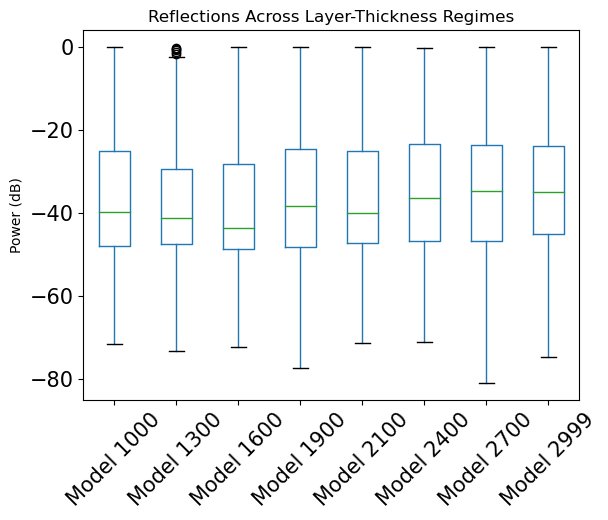

In [106]:
boxFrame = pd.DataFrame()
boxFrame["Model 1000"] = model1000["power (dB)"]
boxFrame["Model 1300"] = model1300["power (dB)"]
boxFrame["Model 1600"] = model1600["power (dB)"]
boxFrame["Model 1900"] = model1900["power (dB)"]
boxFrame["Model 2100"] = model2100["power (dB)"]
boxFrame["Model 2400"] = model2400["power (dB)"]
boxFrame["Model 2700"] = model2700["power (dB)"]
boxFrame["Model 2999"] = model2999["power (dB)"]

plots = boxFrame.boxplot(grid=False, rot=45, fontsize=15) 
plots.set_ylabel("Power (dB)")
plots.set_title("Reflections Across Layer-Thickness Regimes")

Looking at the time versus power plots above, it seems as though the power of the reflections declines the deeper into the ice you go. To verify this I will compare some of the surface reflection power values to those at the base of the ice caps:

Text(0, 0.5, 'Power (dB)')

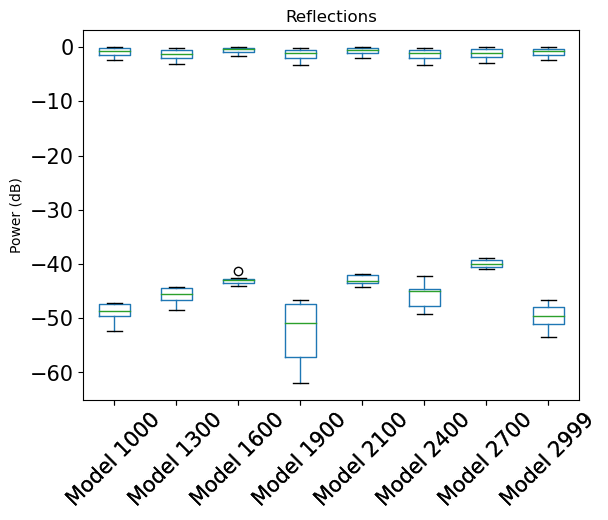

In [115]:
surfaceReflections = pd.DataFrame()
basalReflections = pd.DataFrame()

# For Model 1000 (10-m thick layers)
surfaceStart = int(model1000.loc[model1000["Distance"] >= 0].index[0])
surfaceEnd = int(model1000.loc[model1000["Distance"] >= 10].index[0])
basalStart = int(model1000.loc[model1000["Distance"] >= 1990].index[0])
basalEnd = int(model1000.loc[model1000["Distance"] >= 2000].index[0])

surfaceReflections["Model 1000"] = model1000["power (dB)"].loc[surfaceStart:surfaceEnd,]
basalReflections["Model 1000"] = model1000["power (dB)"].loc[basalStart:basalEnd,]

# For Model 1300 (13-m thick layers)
surfaceStart = int(model1300.loc[model1300["Distance"] >= 0].index[0])
surfaceEnd = int(model1300.loc[model1300["Distance"] >= 13].index[0])
basalStart = int(model1300.loc[model1300["Distance"] >= 1987].index[0])
basalEnd = int(model1300.loc[model1300["Distance"] >= 2000].index[0])

surfaceReflections["Model 1300"] = model1300["power (dB)"].loc[surfaceStart:surfaceEnd,]
basalReflections["Model 1300"] = model1300["power (dB)"].loc[basalStart:basalEnd,]

# For Model 1600 (16-m thick layers)
surfaceStart = int(model1600.loc[model1600["Distance"] >= 0].index[0])
surfaceEnd = int(model1600.loc[model1600["Distance"] >= 16].index[0])
basalStart = int(model1600.loc[model1600["Distance"] >= 1984].index[0])
basalEnd = int(model1600.loc[model1600["Distance"] >= 2000].index[0])

surfaceReflections["Model 1600"] = model1600["power (dB)"].loc[surfaceStart:surfaceEnd,]
basalReflections["Model 1600"] = model1600["power (dB)"].loc[basalStart:basalEnd,]

# For Model 1900 (19-m thick layers)
surfaceStart = int(model1900.loc[model1900["Distance"] >= 0].index[0])
surfaceEnd = int(model1900.loc[model1900["Distance"] >= 19].index[0])
basalStart = int(model1900.loc[model1900["Distance"] >= 1981].index[0])
basalEnd = int(model1900.loc[model1900["Distance"] >= 2000].index[0])

surfaceReflections["Model 1900"] = model1900["power (dB)"].loc[surfaceStart:surfaceEnd,]
basalReflections["Model 1900"] = model1900["power (dB)"].loc[basalStart:basalEnd,]

# For Model 2100 (21-m thick layers)
surfaceStart = int(model2100.loc[model2100["Distance"] >= 0].index[0])
surfaceEnd = int(model2100.loc[model2100["Distance"] >= 21].index[0])
basalStart = int(model2100.loc[model2100["Distance"] >= 1979].index[0])
basalEnd = int(model2100.loc[model2100["Distance"] >= 2000].index[0])

surfaceReflections["Model 2100"] = model2100["power (dB)"].loc[surfaceStart:surfaceEnd,]
basalReflections["Model 2100"] = model2100["power (dB)"].loc[basalStart:basalEnd,]

# For Model 2400 (24-m thick layers)
surfaceStart = int(model2400.loc[model2400["Distance"] >= 0].index[0])
surfaceEnd = int(model2400.loc[model2400["Distance"] >= 24].index[0])
basalStart = int(model2400.loc[model2400["Distance"] >= 1976].index[0])
basalEnd = int(model2400.loc[model2400["Distance"] >= 2000].index[0])

surfaceReflections["Model 2400"] = model2400["power (dB)"].loc[surfaceStart:surfaceEnd,]
basalReflections["Model 2400"] = model2400["power (dB)"].loc[basalStart:basalEnd,]

# For Model 2700 (27-m thick layers)
surfaceStart = int(model2700.loc[model2700["Distance"] >= 0].index[0])
surfaceEnd = int(model2700.loc[model2700["Distance"] >= 27].index[0])
basalStart = int(model2700.loc[model2700["Distance"] >= 1973].index[0])
basalEnd = int(model2700.loc[model2700["Distance"] >= 2000].index[0])

surfaceReflections["Model 2700"] = model2700["power (dB)"].loc[surfaceStart:surfaceEnd,]
basalReflections["Model 2700"] = model2700["power (dB)"].loc[basalStart:basalEnd,]

# For Model 2999 (~30-m thick layers)
surfaceStart = int(model2999.loc[model2999["Distance"] >= 0].index[0])
surfaceEnd = int(model2999.loc[model2999["Distance"] >= 30].index[0])
basalStart = int(model2999.loc[model2999["Distance"] >= 1970].index[0])
basalEnd = int(model2999.loc[model2999["Distance"] >= 2000].index[0])

surfaceReflections["Model 2999"] = model2999["power (dB)"].loc[surfaceStart:surfaceEnd,]
basalReflections["Model 2999"] = model2999["power (dB)"].loc[basalStart:basalEnd,]


surfacePlots = surfaceReflections.boxplot(grid=False, rot=45, fontsize=15) 
surfacePlots.set_ylabel("Power (dB)")
surfacePlots.set_title("Reflections")

basalPlots = basalReflections.boxplot(grid=False, rot=45, fontsize=15) 
basalPlots.set_ylabel("Power (dB)")

This agrees with the power versus time plots above. There is a clear distinction between the dispersion of power values at the surface reflections across all models, and their respective basal reflection power disperion. This is to be expected. As electromagnetic radiation hits a new interface (the icy surface), some power is reflected, some is absorbed, and some is transmitted. As the light/radiation transmits down through the ice, it will eventually encounter material with a new dielectric constant/permittivity value. This would be a new interface where we would get another instance of reflection, absorption, and then transmission. The more stratigraphic layers with distinct dielectric values, the more this will occur. With every instance, more energy is lost from the overall radar signal. This is radar attenuation.

This is good in one sense, and bad in another. It is good because the data produced by the models seem to follow the physics we expect. It is bad, however, because this means that the radar signal will attenuate (weaken) as a function of time/depth. There may therefore be a danger of the signal-to-noise ratio becoming too low, potentially complicating the ability to deconvolve stratigraphy beyond a certain point.

### Deconvolving Martian Stratigraphy

Now that the data has been read in and processed, we can begin setting up the neural network. The tool that we will use for this work is going to be Scikit Learn's MLPClassifier (Multi-layer perceptron classifier), a form of neural network. This tool will take in a vertical column of pixels from a radargram image, which have reflection power values associated with them as you traverse down. Each pixel is one of the inputs to the neural network:

<center><img src="images/multilayerperceptron_network.png"/></center>

The output, at least for the initial work, will be to classify whether or not a given input pixel is a layer interface. Not all layer interfaces appear in a given power versus time plot, radargram, etc. Nor are all reflections layer interfaces (there are radar "echoes").

To analyze the results, I will be creating pairplots between the output variable and doing some statistics of the signal (number of readings X standard deviations above the mean in the series).

### Assigning the training labels

Because the training data (model-generated data above) does not output in neat intervals in accordance with the assignment of "layer" interfaces, (i.e. many of the rows are at distances like "0.852143 meters"). If a layer is to be labelled at intervals of 10 meters, than this means I need to define when it is appropriate to label a row as a layer interface. To this end, I am going to arbitrarily use a round-up, round-down method. That is to say that if layer interfaces occur at 10-meter intervals, and there is a row at a distance of 9.47 meters, it will round down to 9.0 and not be labelled as a layer. If it is 9.53 however, it will round up to 10 and be labelled as a layer interface. This is an interim strategy to allow forward movement of this research, but should be further scrutinized and improved upon if possible.

Below I import my training labels (which includes both layer intervals, as well as associated dielectric constant values (eps) for expansion of this model in the future). I created these when I ran the shell script to iteratively run each of my models above:

In [18]:
labels1000 = pd.read_csv('model_1000_model.csv', sep=",")
labels1300 = pd.read_csv('model_1300_model.csv', sep=",")
labels1600 = pd.read_csv('model_1600_model.csv', sep=",")
labels1900 = pd.read_csv('model_1900_model.csv', sep=",")
labels2100 = pd.read_csv('model_2100_model.csv', sep=",")
labels2400 = pd.read_csv('model_2400_model.csv', sep=",")
labels2700 = pd.read_csv('model_2700_model.csv', sep=",")
labels2999 = pd.read_csv('model_2999_model.csv', sep=",")
labels1000

,Depth (m),eps
0,0.0,2.8
1,10.0,2.8
2,10.0,3.4
3,20.0,3.4
4,20.0,2.8
...,...,...
394,1970.0,3.4
395,1980.0,3.4
396,1980.0,2.8
397,1990.0,2.8


In order to assign the training labels I am:
1) Creating a new column "Layer Interface" to contain the label

2) Reading in the model_X_model.csv files for each repsective model. These files contain a column of for layers, and a column for a respective layer dielectric constant value.

3) Using a lambda function in order to find the depth of the first layer interface. This first depth is technically the difference between the first layer interface and the surface of the ice. Since the surface of the ice is zero m however, we can simply take the distance of the first layer interface to be the layer interval. The remaining intervals need to be calculated by using the "model_X_model.csv" output files that were generated when I ran the shell script above to generate the model data. Each time the 1D Simulator is run, it generates the output data file as well as the model_X_model.csv file, which essentially contains the input parameteres for the simulator: number of layers, their respective thicknesses and their respective dielectric constant values. By iterating down the rows of this file all traiing data can be correctly assigned to the models. As I have a distance column calculated already, we can go row by row to find values that fit the interval. Rather than looking for exact values I am rounding the rows up/down to their nearest integer. If the rounded integer is divisible by the layer interval distance, than it is labeled "True" for "true, this is a Layer Interface".

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# If a distance is within 0.5 of a number divisible by whatever the layer thickness interval is, it is labelled as a layer interface row
model1000["Layer Interface"] = model1000["Distance"].apply(lambda x: True if round(x) % (labels1000["Depth (m)"][1]-labels1000["Depth (m)"][0]) == 0 else False) 
model1300["Layer Interface"] = model1300["Distance"].apply(lambda x: True if round(x) % (labels1300["Depth (m)"][1]-labels1300["Depth (m)"][0]) == 0 else False) 
model1600["Layer Interface"] = model1600["Distance"].apply(lambda x: True if round(x) % (labels1600["Depth (m)"][1]-labels1600["Depth (m)"][0]) == 0 else False) 
model1900["Layer Interface"] = model1900["Distance"].apply(lambda x: True if round(x) % (labels1900["Depth (m)"][1]-labels1900["Depth (m)"][0]) == 0 else False) 
model2100["Layer Interface"] = model2100["Distance"].apply(lambda x: True if round(x) % (labels2100["Depth (m)"][1]-labels2100["Depth (m)"][0]) == 0 else False) 
model2400["Layer Interface"] = model2400["Distance"].apply(lambda x: True if round(x) % (labels2400["Depth (m)"][1]-labels2400["Depth (m)"][0]) == 0 else False) 
model2700["Layer Interface"] = model2700["Distance"].apply(lambda x: True if round(x) % (labels2700["Depth (m)"][1]-labels2700["Depth (m)"][0]) == 0 else False) 
model2999["Layer Interface"] = model2999["Distance"].apply(lambda x: True if round(x) % (labels2999["Depth (m)"][1]-labels2999["Depth (m)"][0]) == 0 else False) 


model1300.head(20)

,Time (s),power (dB),amplitude (real),amplitude (imag),Distance,Layer Interface
2125,1.000235e-08,-0.147417,-1.666096e-06,1.993510e-06,0.852143,False
2126,3.000706e-08,-0.404372,-5.757337e-07,-2.455749e-06,2.556430,False
2127,5.001177e-08,-0.769617,2.211578e-06,9.787317e-07,4.260716,False
2128,7.001647e-08,-1.230902,-2.009123e-06,1.105904e-06,5.965003,False
2129,9.002118e-08,-1.781103,3.302092e-07,-2.127137e-06,7.669289,False
2130,1.100259e-07,-2.418547,1.365499e-06,1.461709e-06,9.373576,False
2131,1.300306e-07,-3.140816,-1.835281e-06,1.410067e-07,11.077862,False
2132,1.500353e-07,-3.935319,9.585032e-07,-1.379482e-06,12.782149,True
2133,1.700400e-07,-4.772496,4.087090e-07,1.469673e-06,14.486435,False
2134,1.900447e-07,-5.606803,-1.260546e-06,-5.755823e-07,16.190722,False


As shown above, for a layer interval of 13 meters (the interval for model1300), a distance of 12.782149 meters (row 2132) and a distance of 26.416441 meters (row 2140) are both recognized as being close enough to the known location of a stratigraphic layer, that they are labelled as true. It is hoped that the neural network will be able to build an association between the time, and respective power values such that it will be able to then correctly assign the locations of stratigraphic layers in the raw SHARAD radar sounder data.'

The complete figure for model1300 looks like this with the stratigraphy assigned in the correct place:

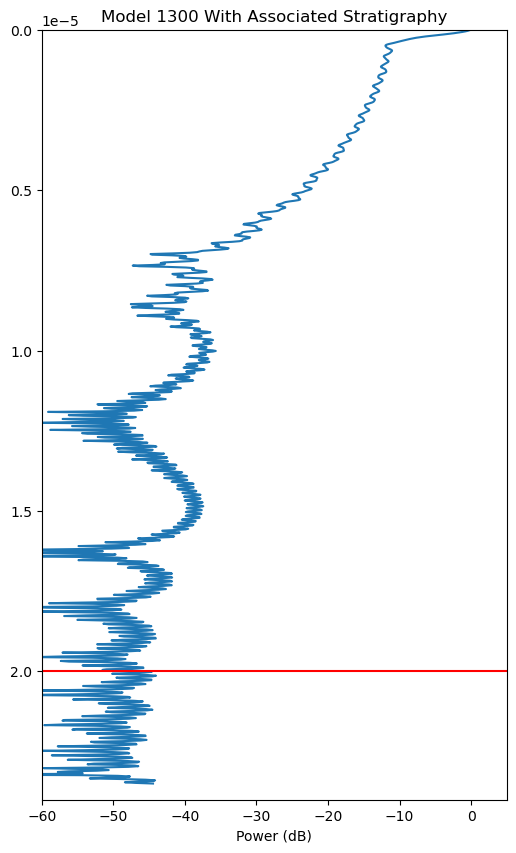

In [78]:
mod1300Plot = model1300.plot(x='power (dB)', y='Time (s)', xlabel="Power (dB)", ylabel="", legend=False, figsize=(6,10))
mod1300Plot.set_ylim(0, 0.0000240)
mod1300Plot.set_xlim(-60, 5)
mod1300Plot.invert_yaxis()
mod1300Plot.set_title("Model 1300 With Associated Stratigraphy")


model1300["Layer Interface"] = model1300["Distance"].apply(lambda x: True if round(x) % (labels1300["Depth (m)"][1]-labels1300["Depth (m)"][0]) == 0 else False) 

surfaceStart = int(model1300.loc[model1300["Distance"] >= 0].index[0])


#model1300["Layer Interface"] = model1300["Distance"].apply(lambda x: True if round(x) % labels1300["Depth (m)"][1] == 0 else False) 
mod1300Plot.axhline(y=0.00002,color='r',linestyle='-')

In [20]:
model1300[""] int(model1300.loc[model1300["Distance"] >= 0].index[0])

SyntaxError: invalid syntax (2724810050.py, line 1)

### Methodology

This training data makes was scripted to automatically generate models which have preset layer boundaries at consistent intervals. This allows me to run the entire process from data generation, data processing, model integration of the data, labeling of the training data, as well as training of the neural network. A concern I have leading into this preliminary attempt to deconvolve the stratigraphy of the NPLD is that the neural network will recognize only the interval distance between layer interfaces (which is consistent for this initial run).

Furthermore, I will run the initial training sequence using a single model-generated dataset. This is for ease of confirming the pipeline itself and more training sets will rapidly be integrated into the 

After validating the entire data pipeline through to the running of the neural network, I will begin reconstructing the pipeline itself to holistically integrate the entirety of the data I have generated. It will not be until this point that I hope for trully meaningful data-trained results.

Finally, in the future I will also want to integrate dielectric constants into the system, however I will first test this approach with layer interfaces only.

### Training the Neural Network

In [116]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### SHARAD instrument documentation: 
Seu, R., Phillips, R. J., Biccari, D., Orosei, R., Masdea, A., Picardi, G., Safaeinili, A., Campbell, B. A., Plaut, J. J., Marinangeli, L., Smrekar, S. E., & Nunes, D. C. (2007). SHARAD sounding radar on the Mars Reconnaissance Orbiter. Journal of Geophysical Research, 112(E5), E05S05. https://doi.org/10.1029/2006JE002745

#### Background reading:
Byrne, S. (2009). The Polar Deposits of Mars. Annual Review of Earth and Planetary Sciences, 37(1), 535–560. https://doi.org/10.1146/annurev.earth.031208.100101

Smith, I. B., Hayne, P. O., Byrne, S., Becerra, P., Kahre, M., Calvin, W., ... & Horgan, B.
(2020), The Holy Grail: A road map for unlocking the climate record stored within Mars’ polar
layered deposits, Planet. Space Sci., 184, 104841. https://doi.org/10.1016/j.pss.2020.104841